In [1]:
# todo save as a feather file
# TODO change the way plots with target values are plotted

In [2]:
#imports
from data_loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 12
import numpy as np

from utils.visulization import plot_distribution_of_numerical_data, plot_distribution_of_numerical_data_with_target
from utils.visulization import plot_categorical_histogram, plot_categorical_histogram_with_target
from utils.visulization import plot_correlation, plot_correlation_for_categorical_data


In [3]:
# about dataset:

# data is avalable here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 
# This dataset is public available for research. The details are described in 
# [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to 
# Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier,
# 62:22-31, June 2014




# Input variables:
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov, 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [4]:
# IDEJE 
# 14 - previous: --> convertat u 0 ili 1 je li bilo poziva prije ili ne
# kad je 0 u previous onda je unkwon u outcome -> moze utjecat na vizualizaciju /korelaciju

# plot kategoricki po labelama triba normalizirat jer je previse zastupljen broj negativa + odredenih poslova
# pa se ni ne vidi ako je neka kategorija problematicna

# 11-> duration -> tribalo bi izbacit -> pogledaj opis na kraju file-a

# neke kategoricke u broj preko npr postotaka ili neke druge informacije

In [5]:
dl = DataLoader("./config.json") # TODO load bank full later
inputs, labels = dl.load_csv_data(filename="bank-additional-full.csv") #  TODO load all
print("number of null elements:", inputs.isnull().values.sum())
inputs.head()

loading data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\bank-additional-full.csv
number of null elements: 0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [6]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
numeric_columns = ['age', 'campaign', 'duration', 'pdays', 
                   'previous', 'emp.var.rate', 'cons.price.idx', 
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

In [8]:
print("number of numerical columns:", len(numeric_columns))
print(numeric_columns)
all_columns = inputs.columns
categorical_columns = list(set(all_columns) - set(numeric_columns))
print("number of categorical columns:", len(categorical_columns))
print(categorical_columns)

number of numerical columns: 10
['age', 'campaign', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
number of categorical columns: 10
['job', 'contact', 'loan', 'poutcome', 'education', 'default', 'housing', 'month', 'marital', 'day_of_week']


In [9]:
numerical_data = inputs[numeric_columns]
numerical_data = numerical_data.join(labels)
numerical_data.head()

,age,campaign,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,261,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,149,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,226,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,151,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,307,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
categorical_data = inputs[categorical_columns]
categorical_data = categorical_data.join(labels)
print(categorical_data[categorical_data.y == 'no'].shape[0])
print(categorical_data[categorical_data.y == 'yes'].shape[0])

36548
4640


# Ploting feature correlation

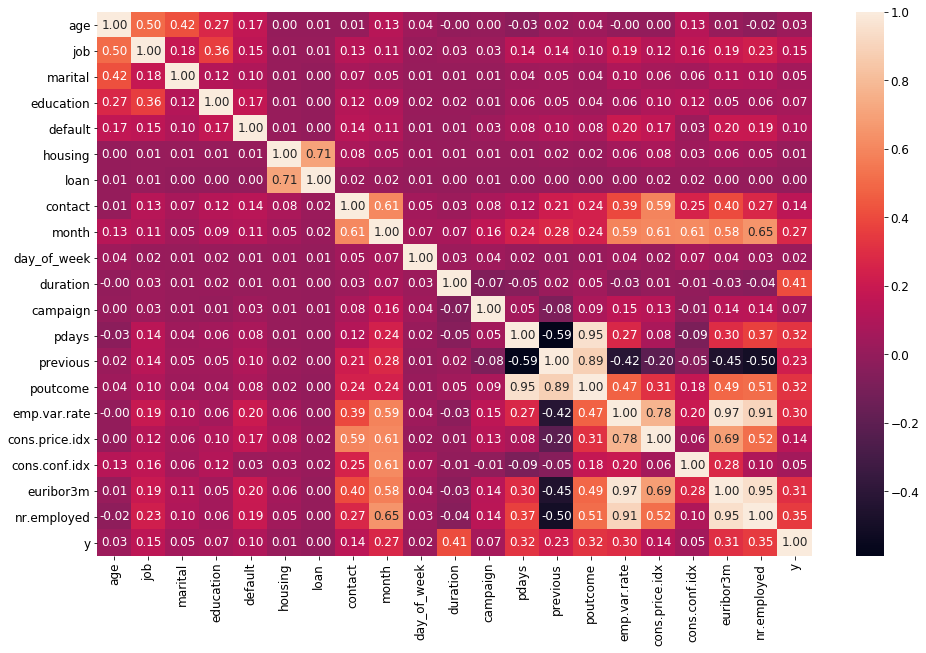

In [12]:
full_data = inputs.join(labels)
plot_correlation_for_categorical_data(full_data)

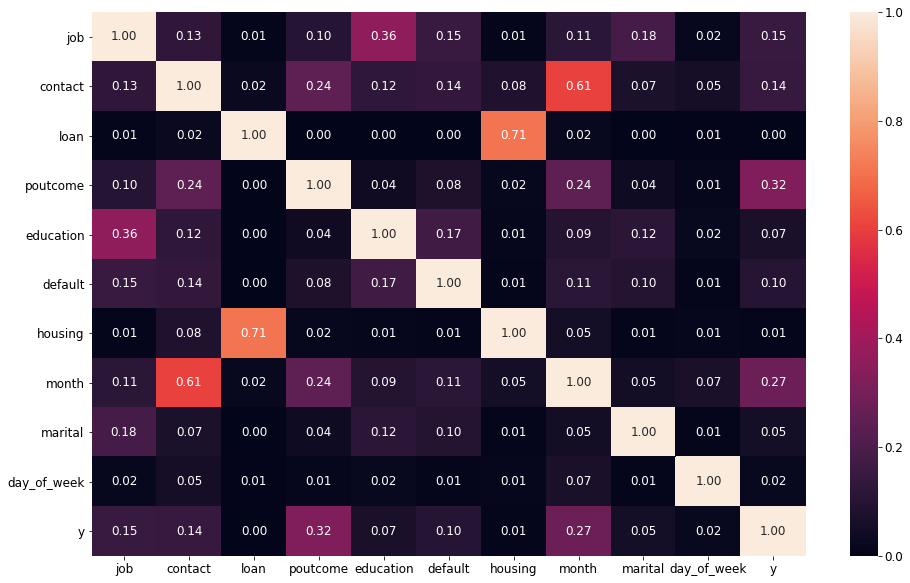

In [13]:
plot_correlation_for_categorical_data(categorical_data)

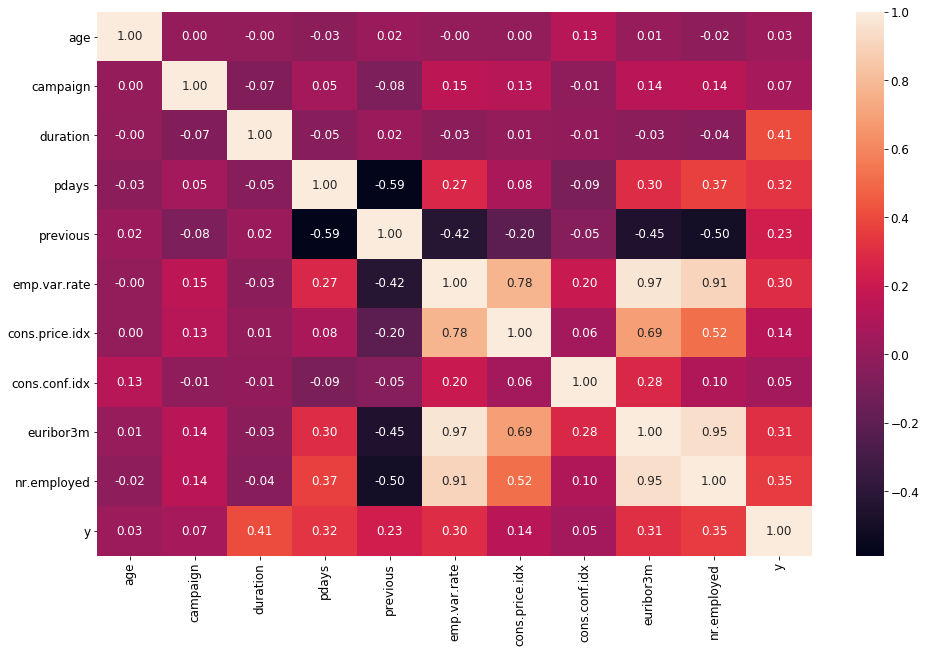

In [14]:
plot_correlation_for_categorical_data(numerical_data)

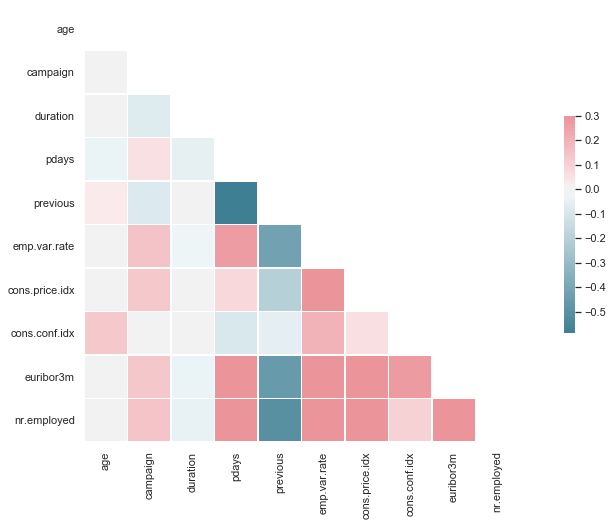

In [15]:
plot_correlation(numerical_data) # y won't be displayed

# Ploting data distribution

## for numerical data:

In [16]:
TARGET_COLUMN = "y"

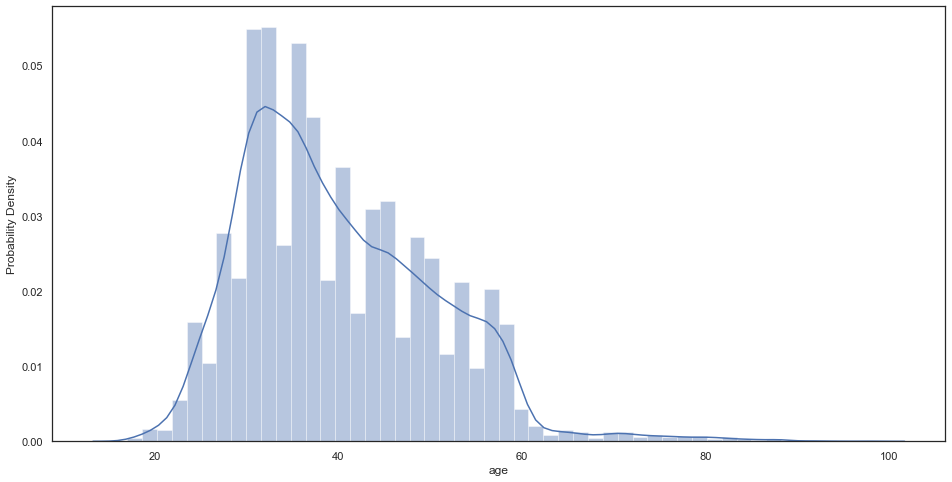

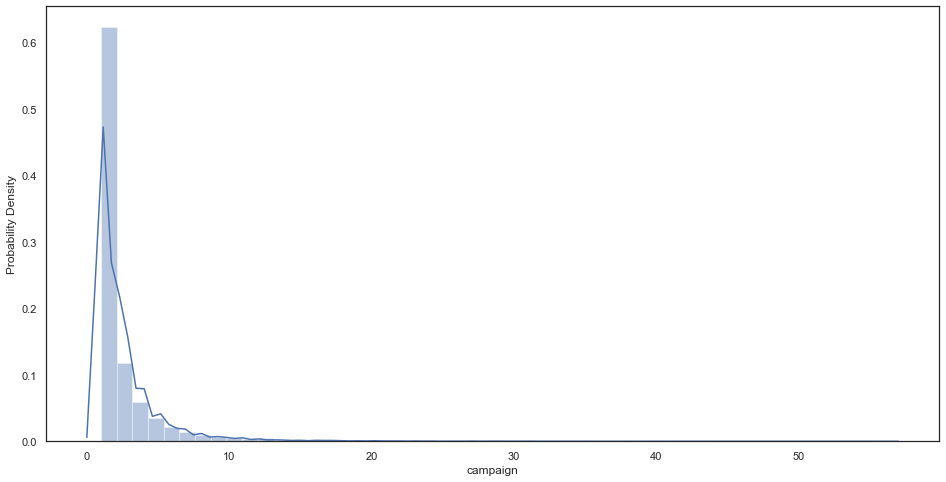

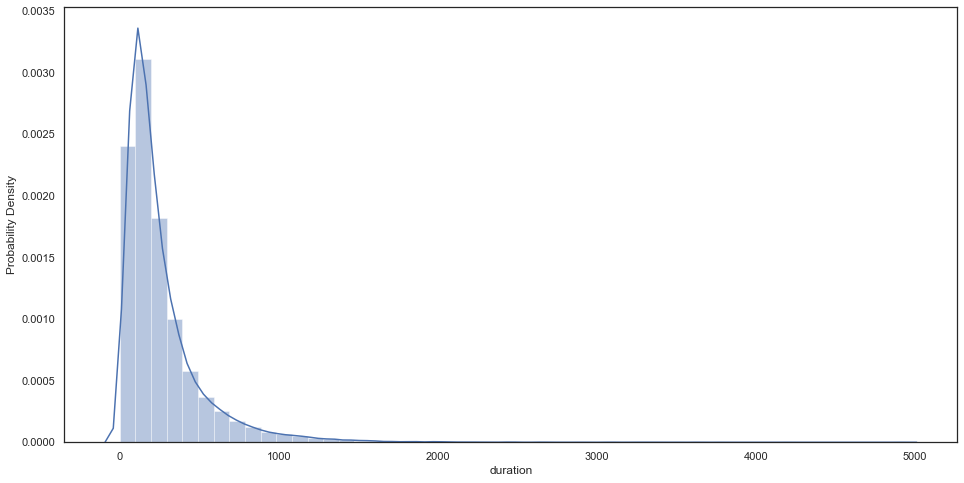

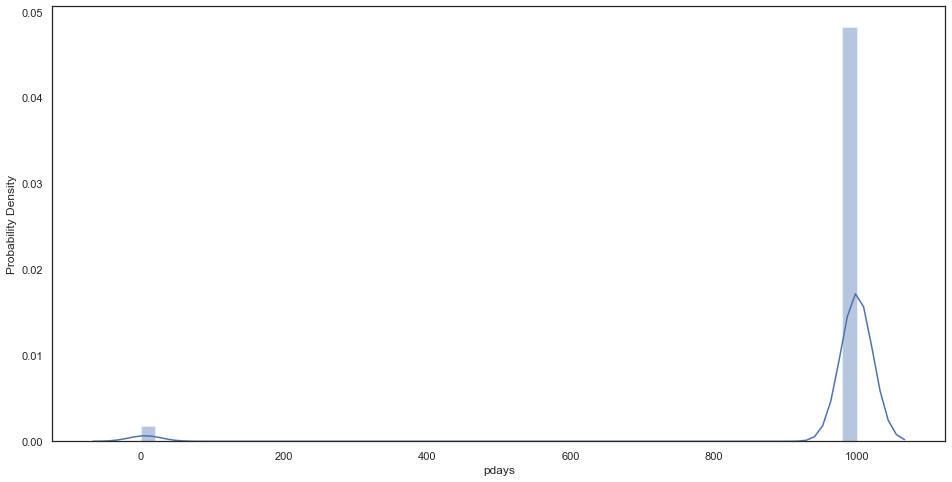

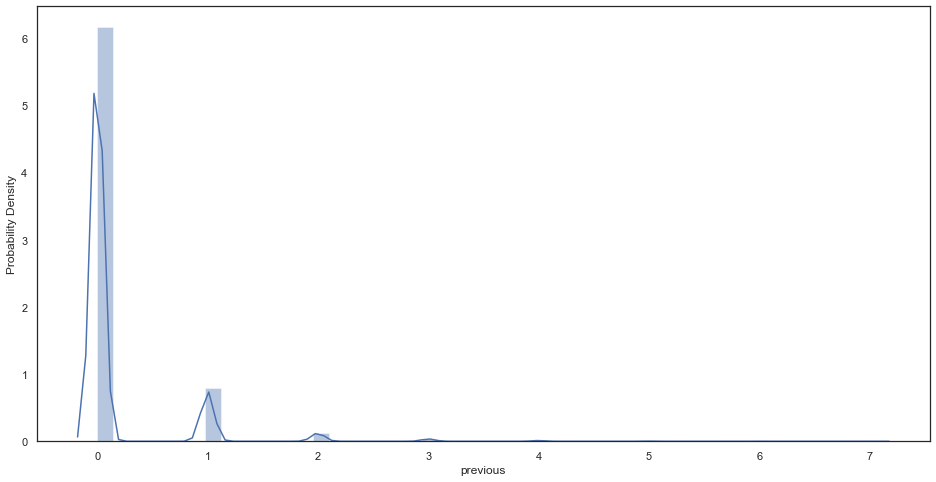

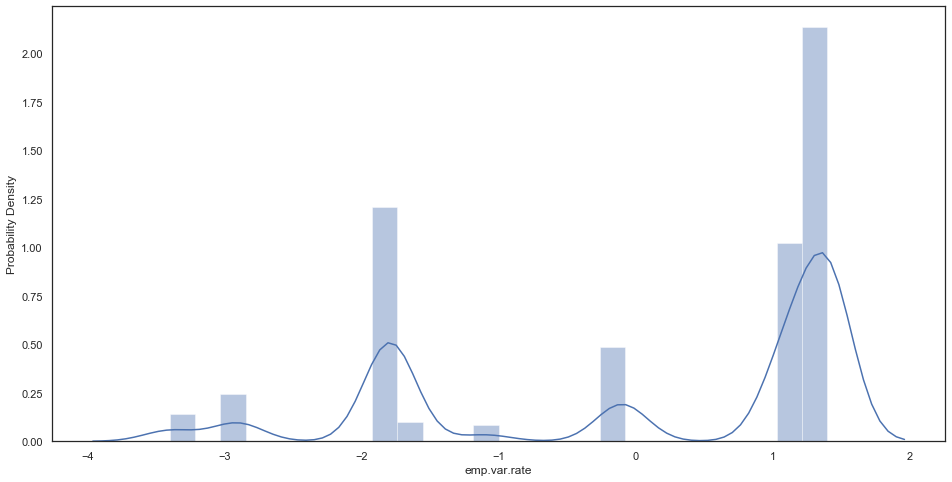

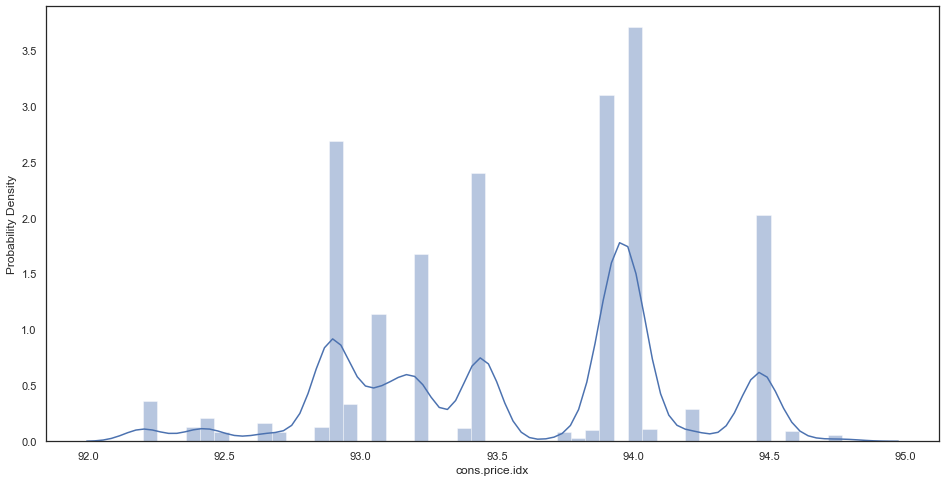

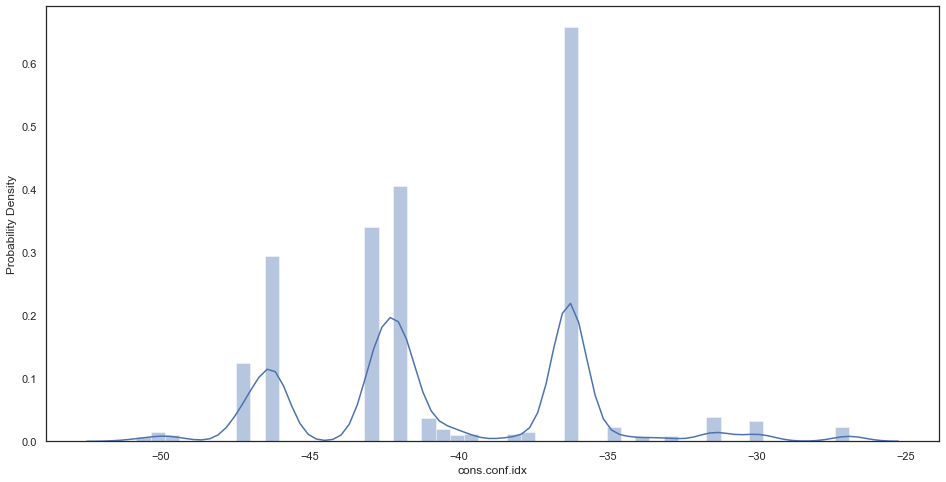

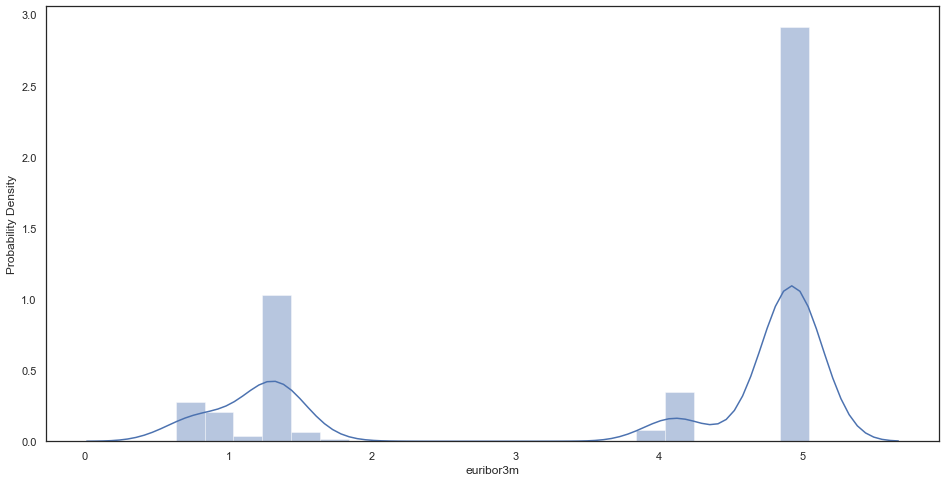

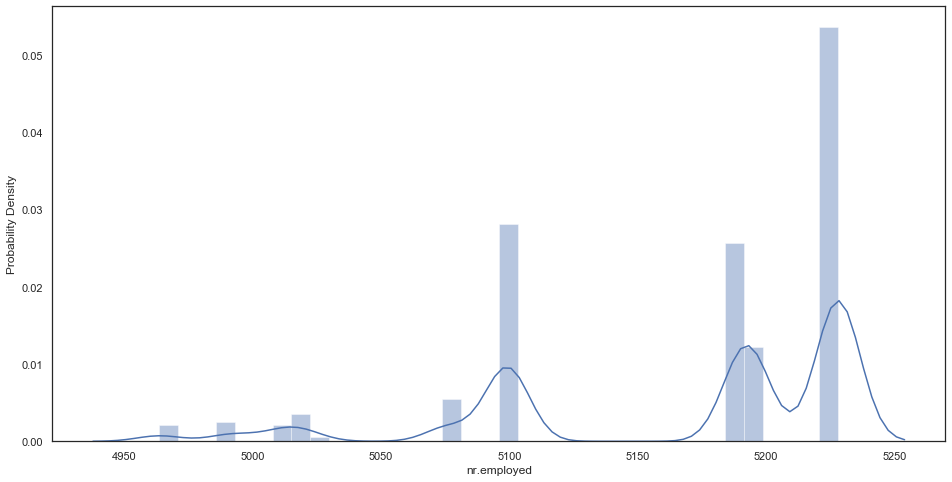

In [17]:
for column in numerical_data:
    if column != TARGET_COLUMN:
        plot_distribution_of_numerical_data(numerical_data[column], save_figure=True)

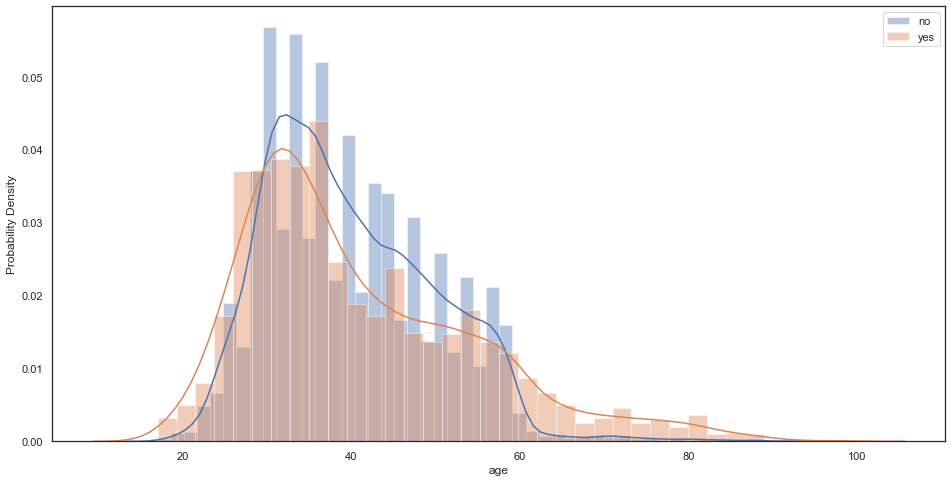

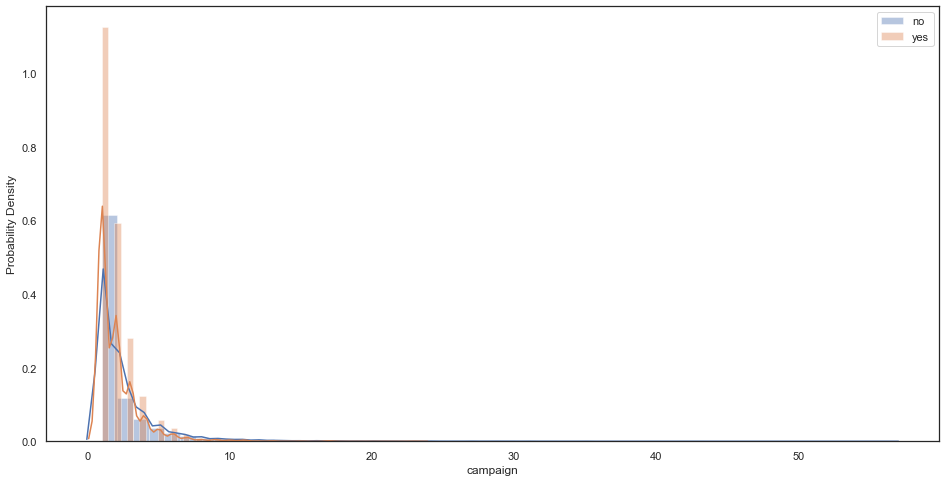

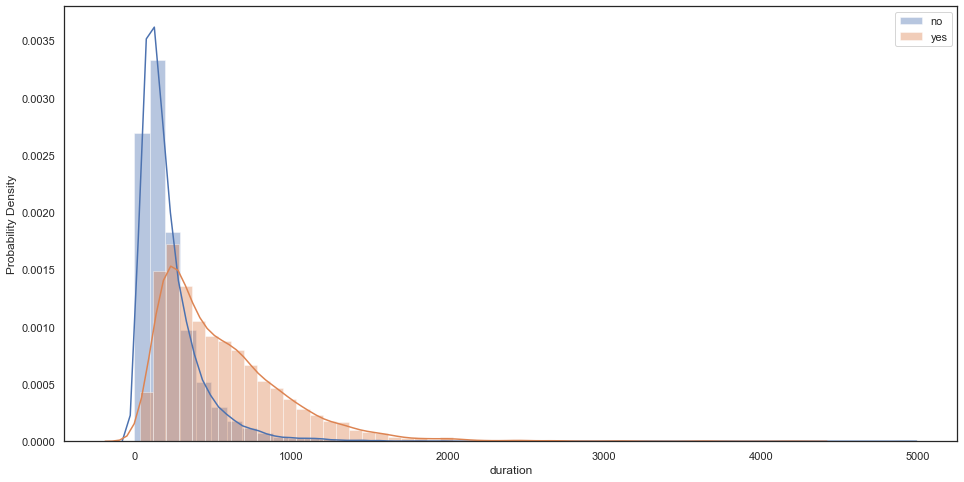

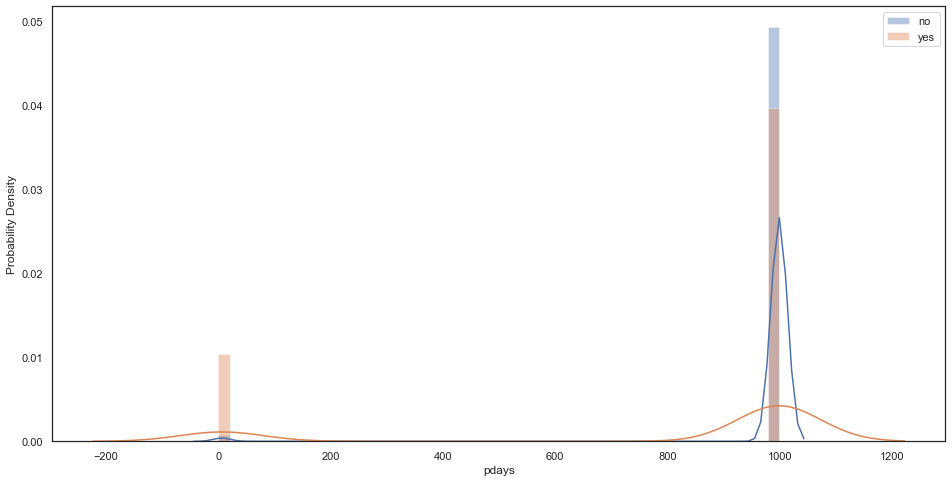

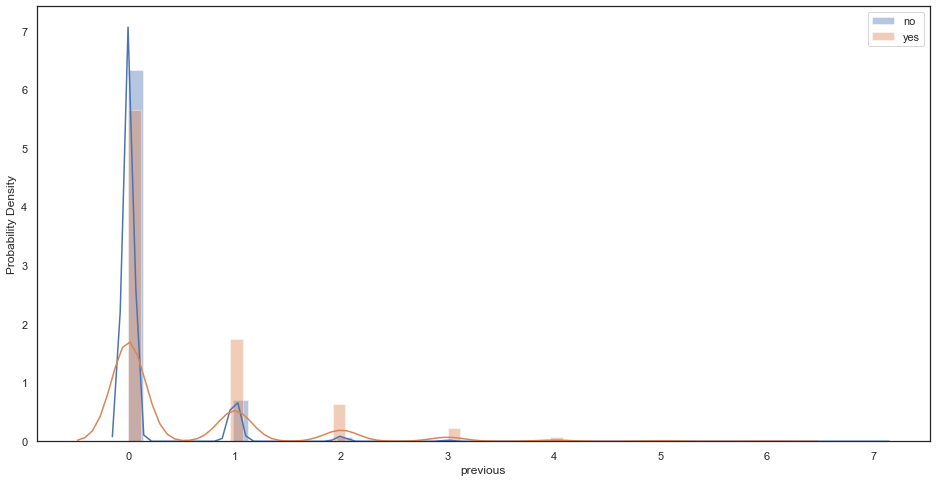

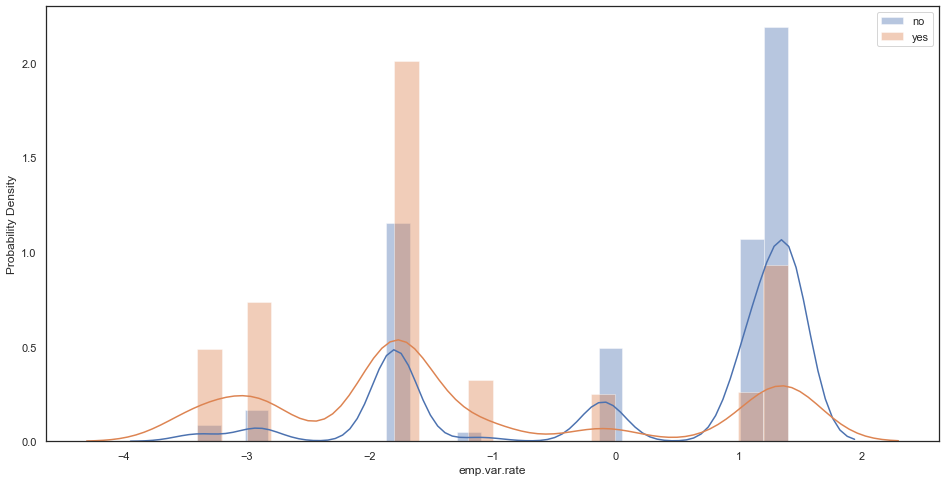

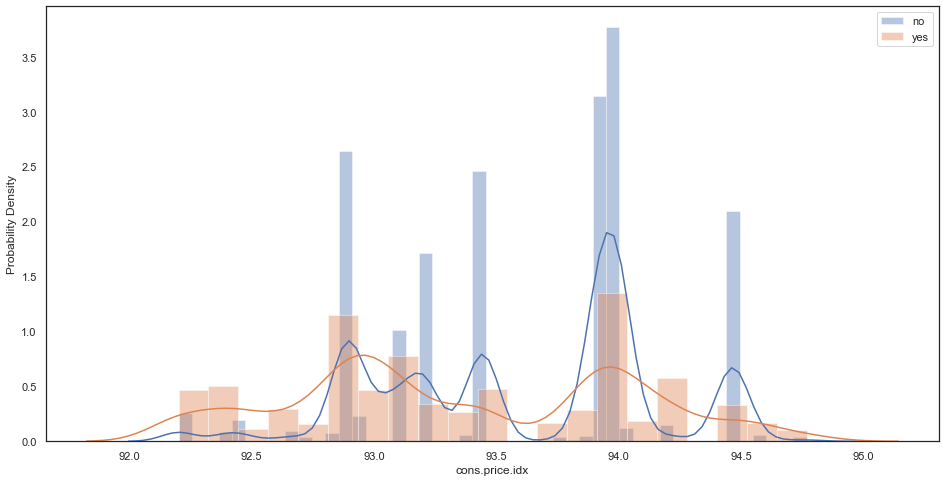

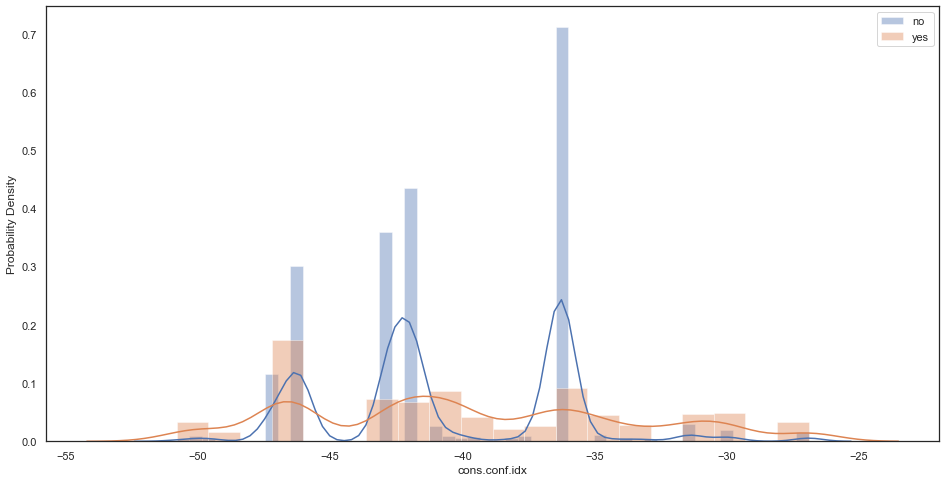

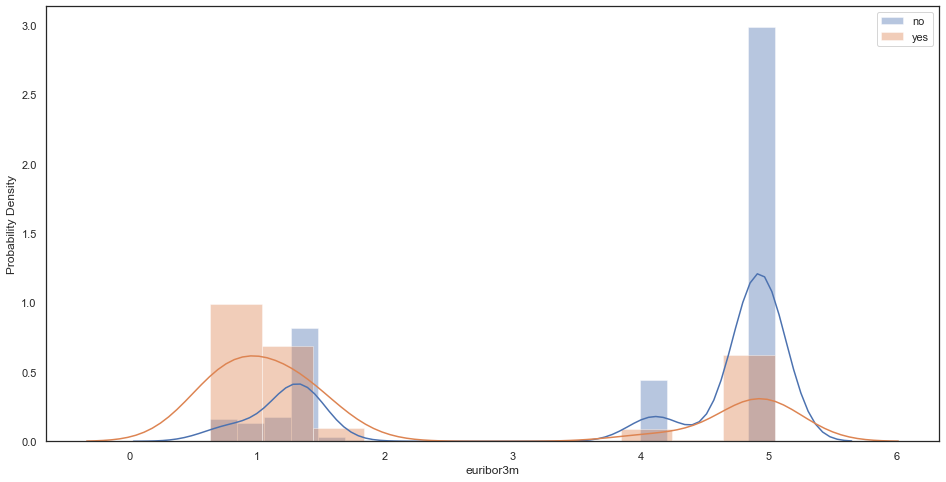

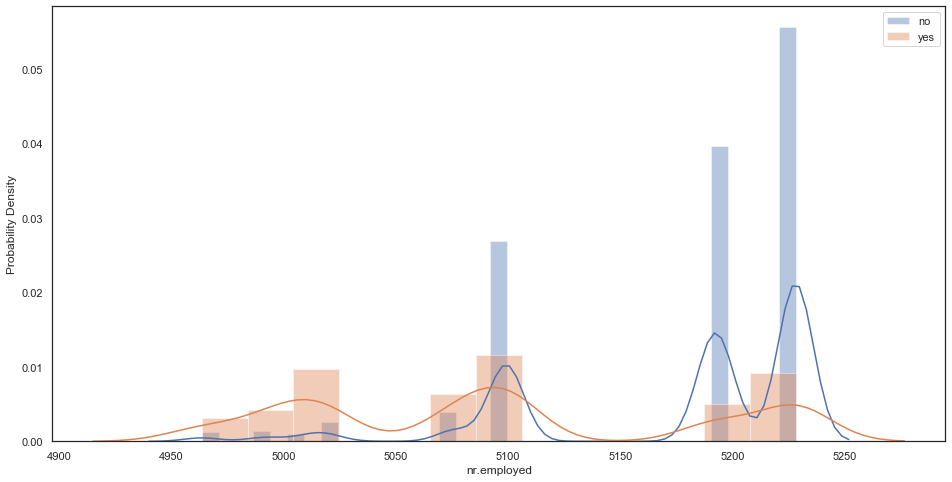

In [18]:
for column in numerical_data:
    if column != TARGET_COLUMN:
        plot_distribution_of_numerical_data_with_target(numerical_data, column_name=column, 
                                                    xlabel=column, save_figure=True)

## for categorical data:

['job', 'contact', 'loan', 'poutcome', 'education', 'default', 'housing', 'month', 'marital', 'day_of_week', 'y']


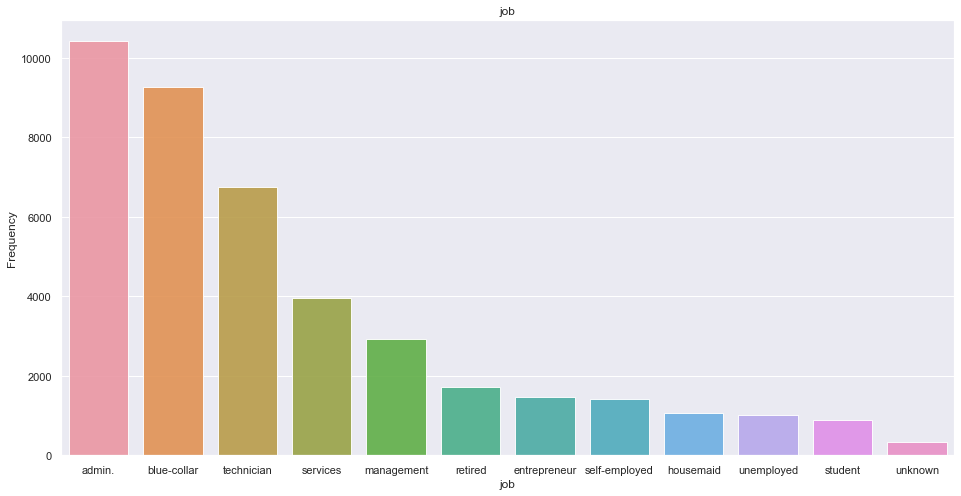

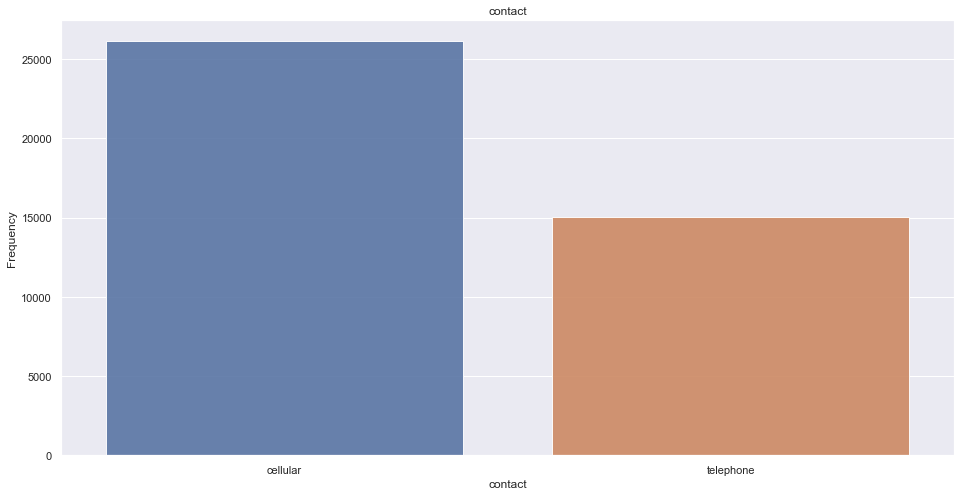

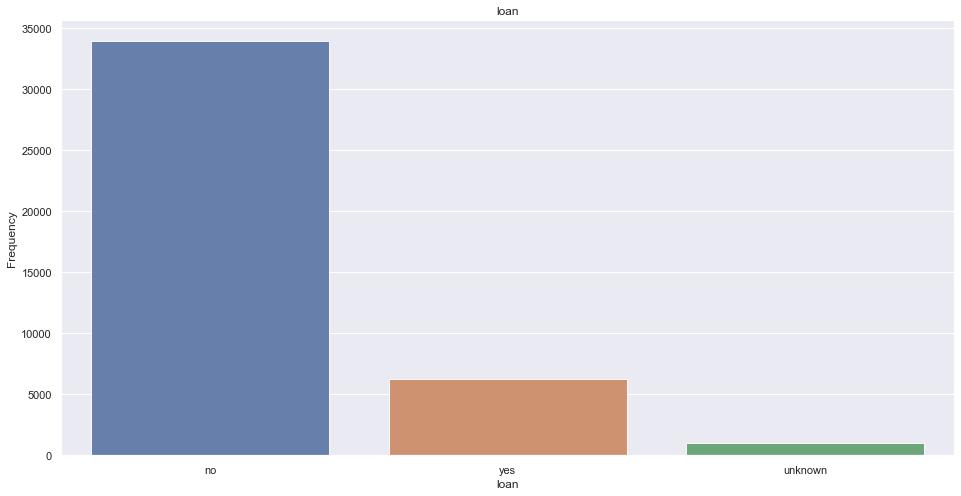

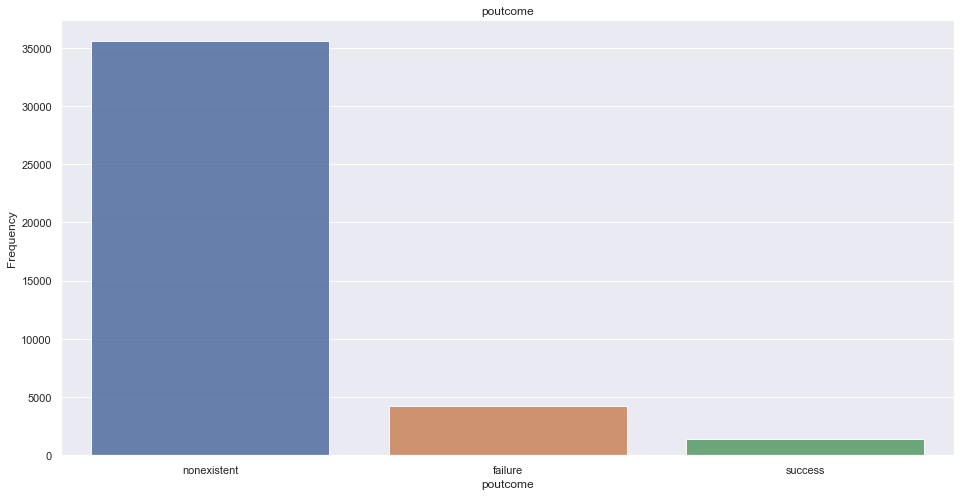

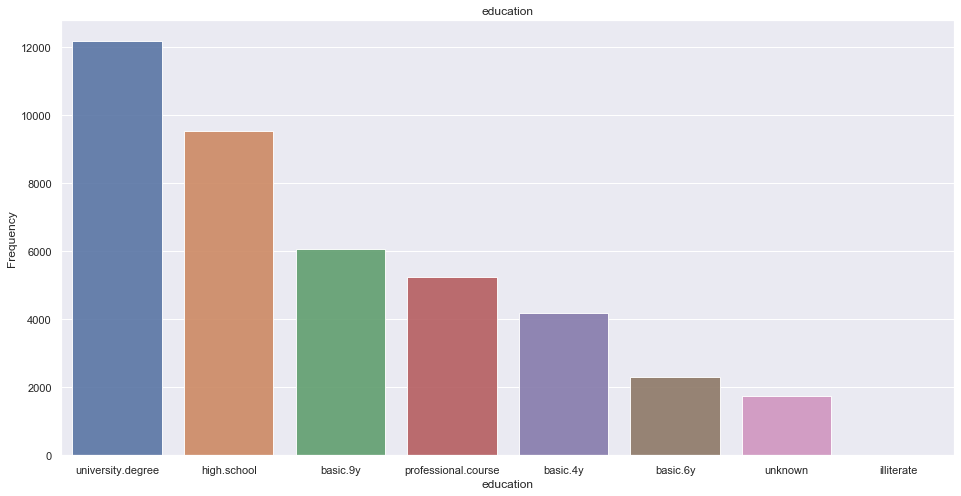

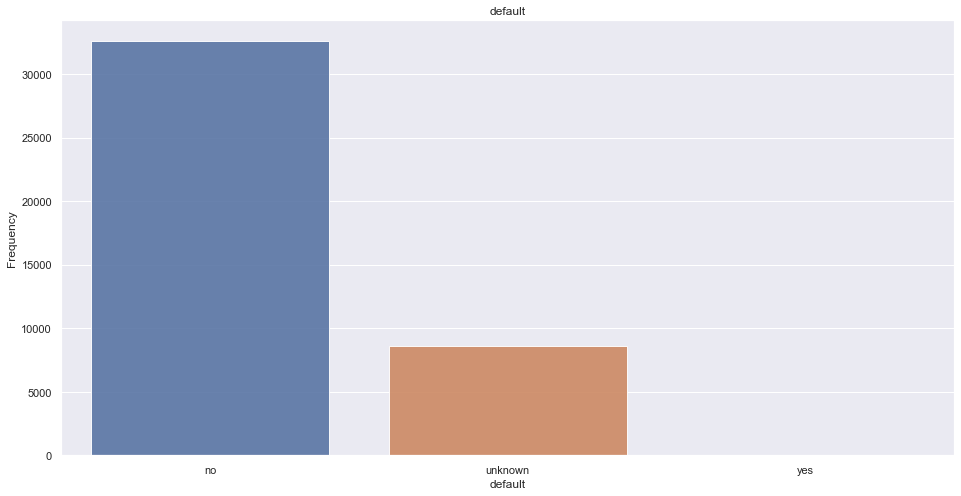

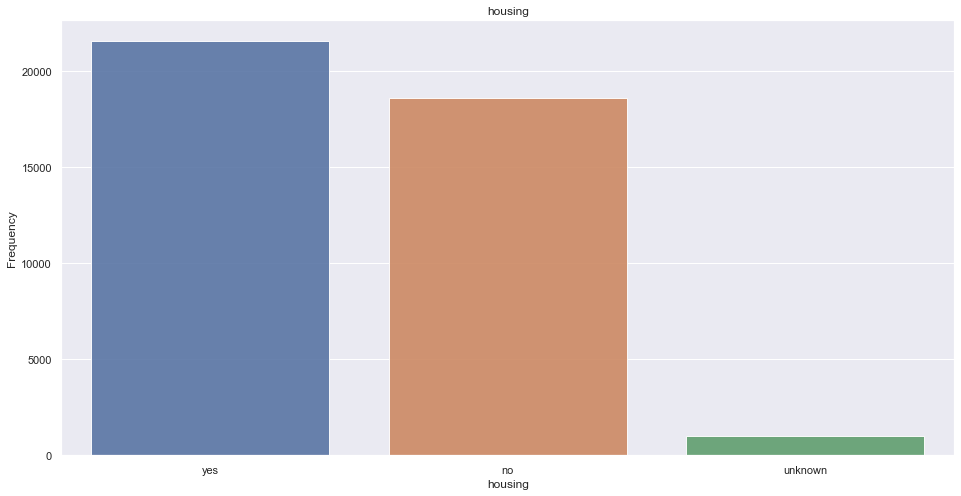

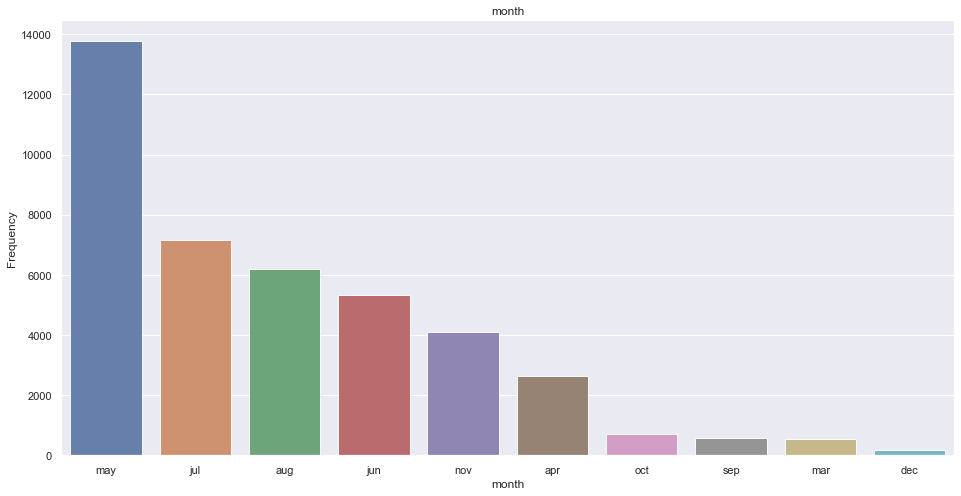

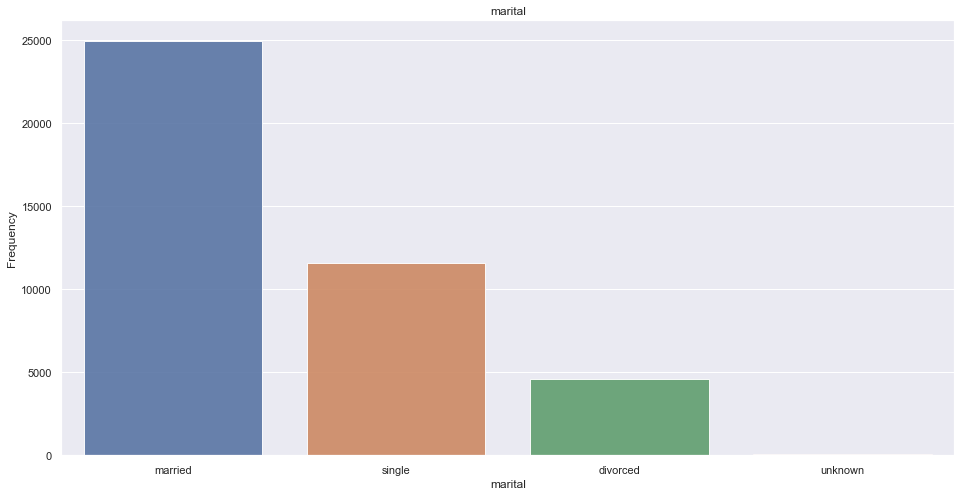

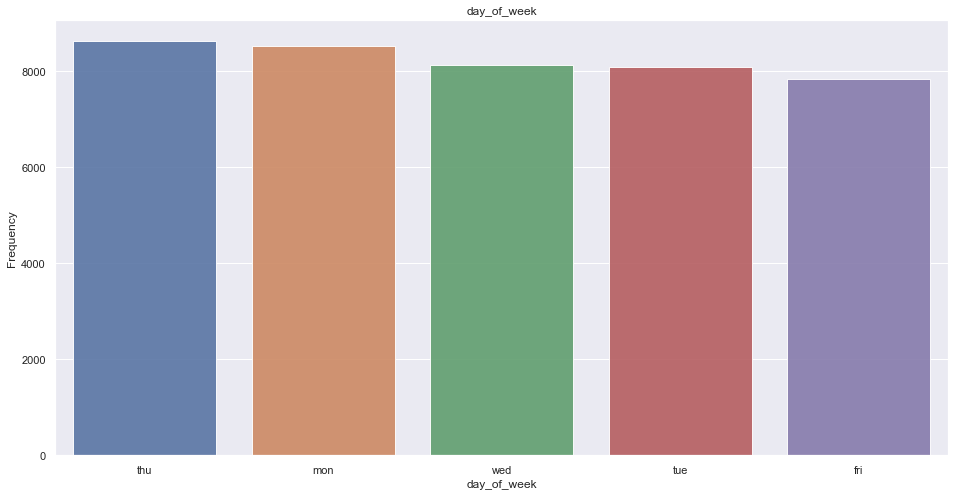

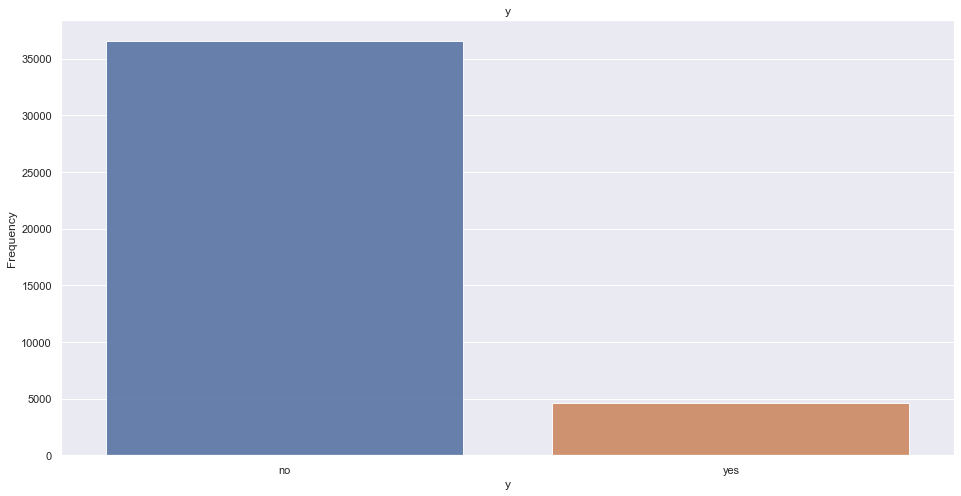

In [19]:
if 'y' not in categorical_columns:
    categorical_columns.append('y')
    
print(categorical_columns)
for column in categorical_columns:
    plot_categorical_histogram(column_name=column, title=column, 
                               data_frame=full_data, save_figure=True)

job
print(class1): job
admin.           9070
blue-collar      8616
entrepreneur     1332
housemaid         954
management       2596
retired          1286
self-employed    1272
services         3646
student           600
technician       6013
unemployed        870
unknown           293
dtype: int64
[87, 93, 91, 90, 88, 74, 89, 91, 68, 89, 85, 88]


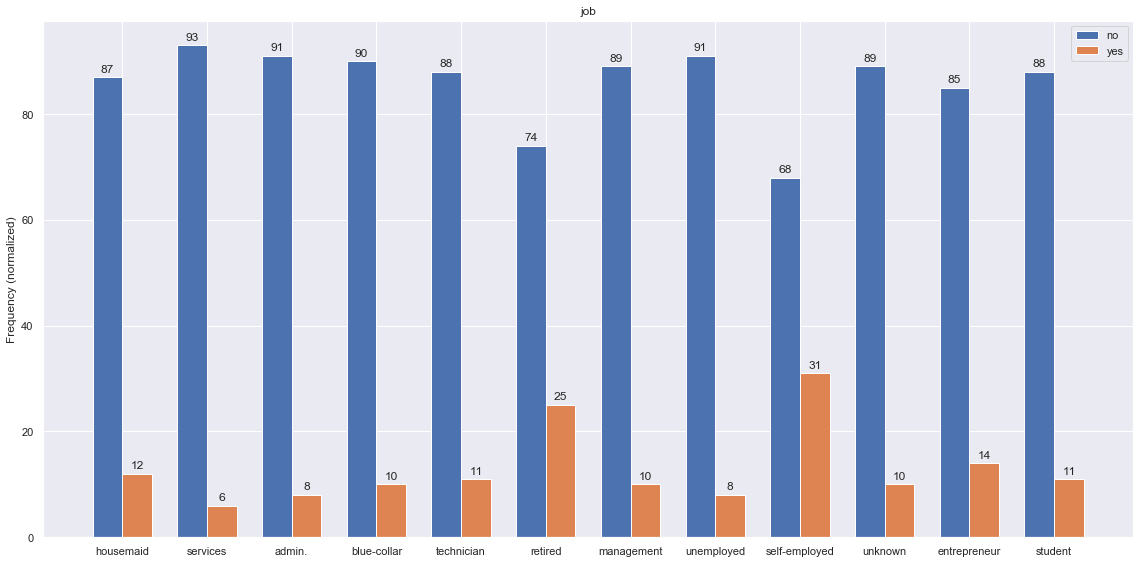

contact
print(class1): contact
cellular     22291
telephone    14257
dtype: int64
[85, 94]


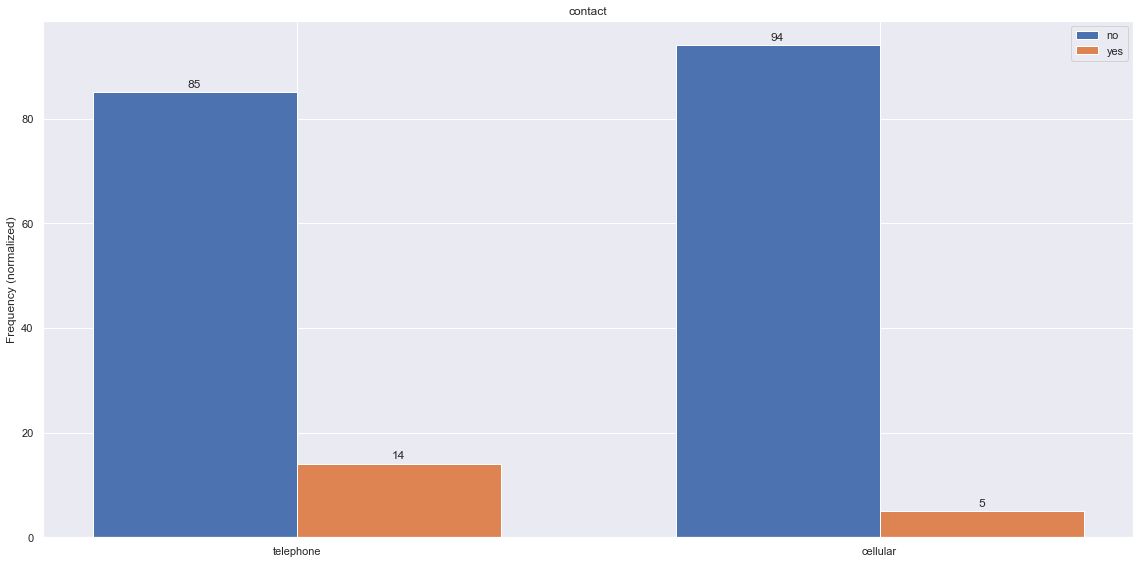

loan
print(class1): loan
no         30100
unknown      883
yes         5565
dtype: int64
[88, 89, 89]


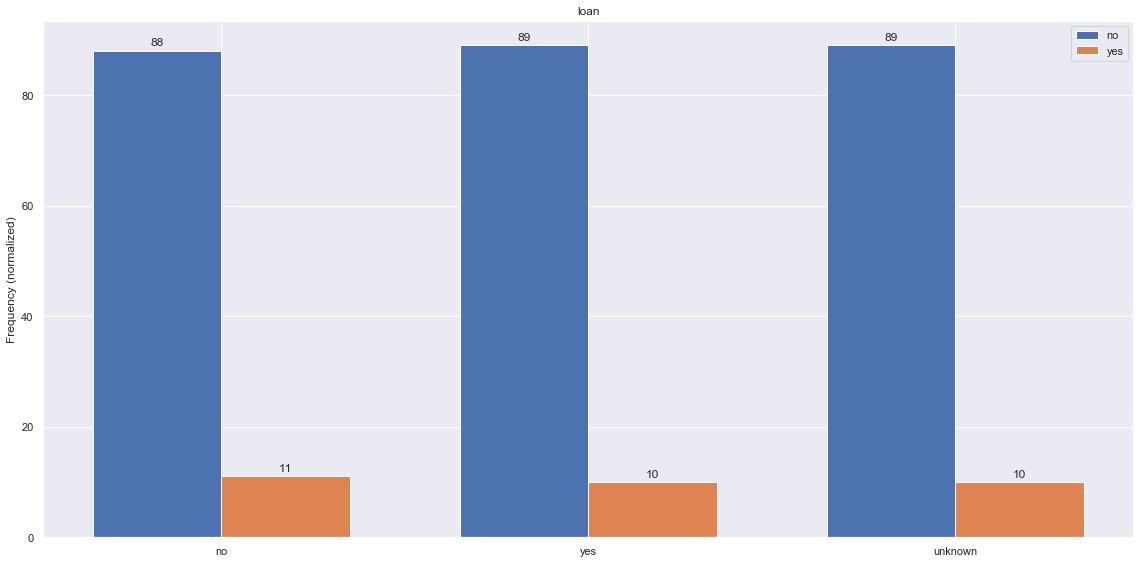

poutcome
print(class1): poutcome
failure         3647
nonexistent    32422
success          479
dtype: int64
[85, 91, 34]


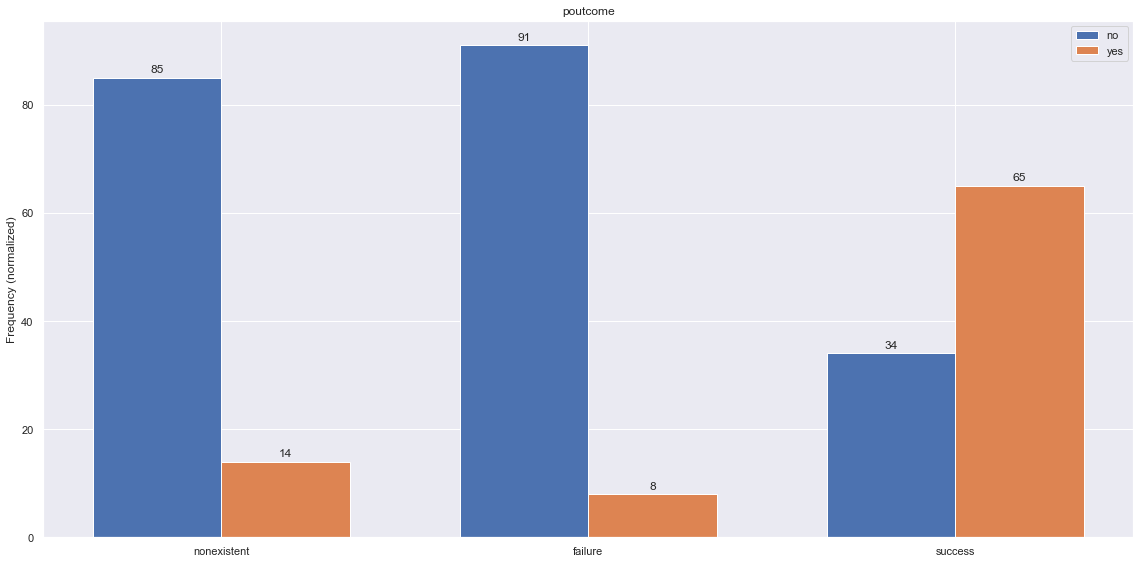

education
print(class1): education
basic.4y                3748
basic.6y                2104
basic.9y                5572
high.school             8484
illiterate                14
professional.course     4648
university.degree      10498
unknown                 1480
dtype: int64
[89, 91, 92, 89, 77, 88, 86, 85]


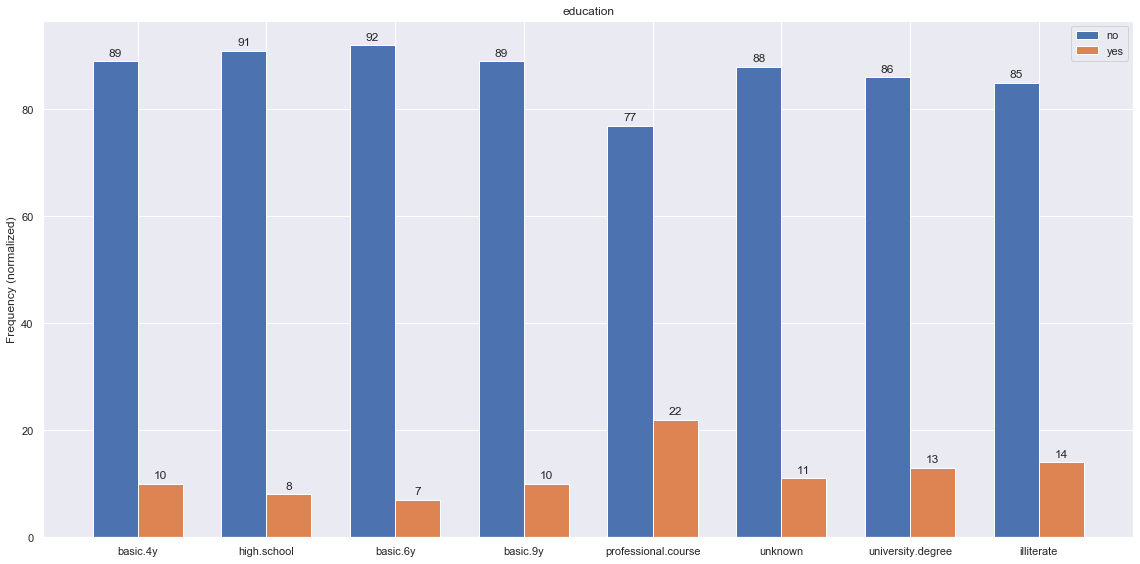

housing
print(class1): housing
no         16596
unknown      883
yes        19069
dtype: int64
[89, 89, 88]


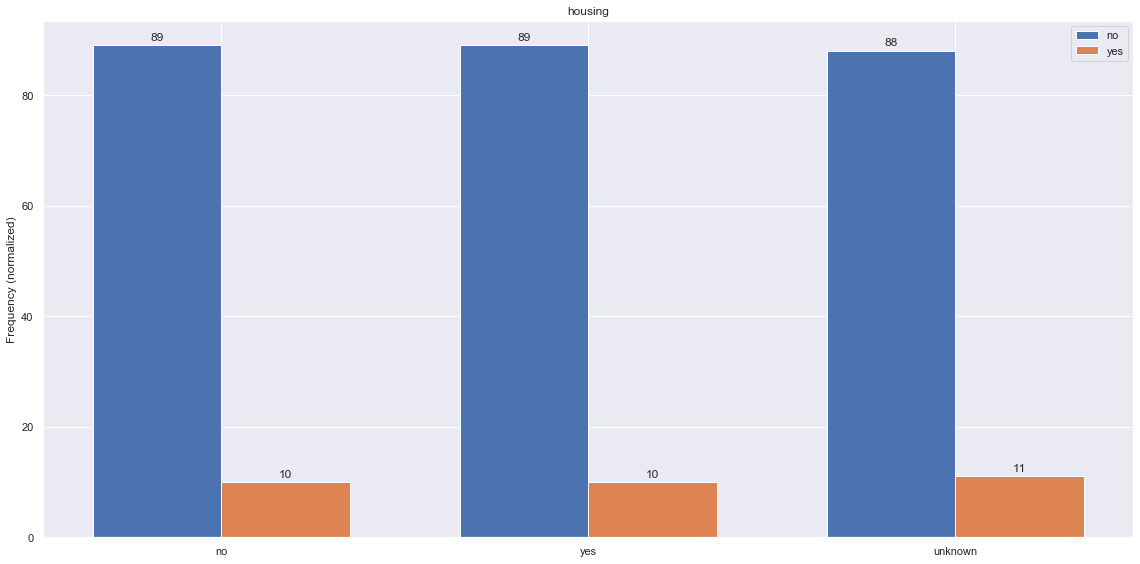

month
print(class1): month
apr     2093
aug     5523
dec       93
jul     6525
jun     4759
mar      270
may    12883
nov     3685
oct      403
sep      314
dtype: int64
[79, 89, 51, 90, 89, 49, 93, 89, 56, 55]


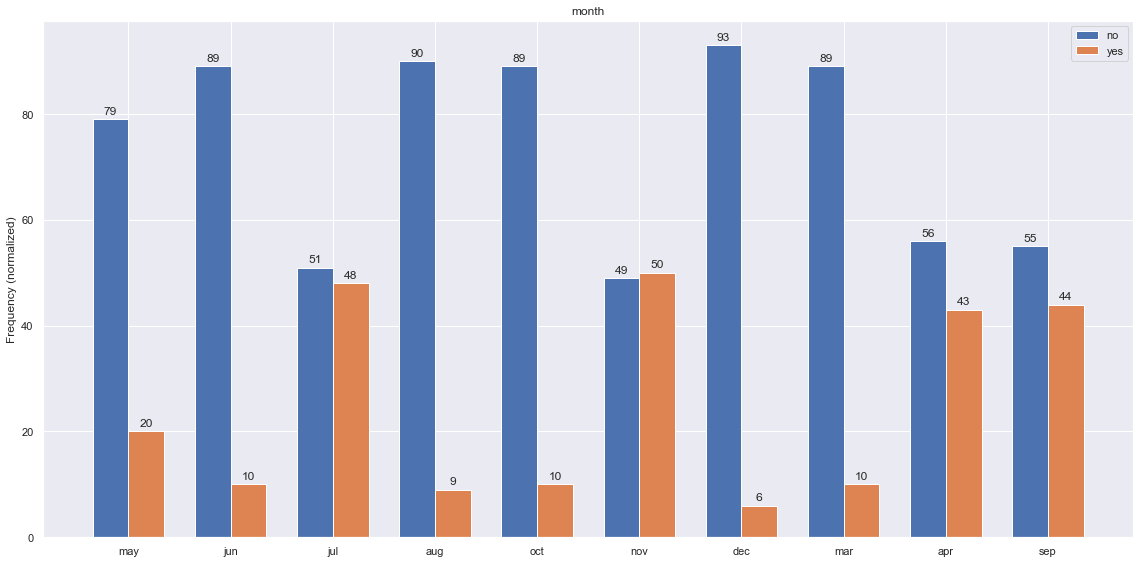

marital
print(class1): marital
divorced     4136
married     22396
single       9948
unknown        68
dtype: int64
[89, 89, 85, 85]


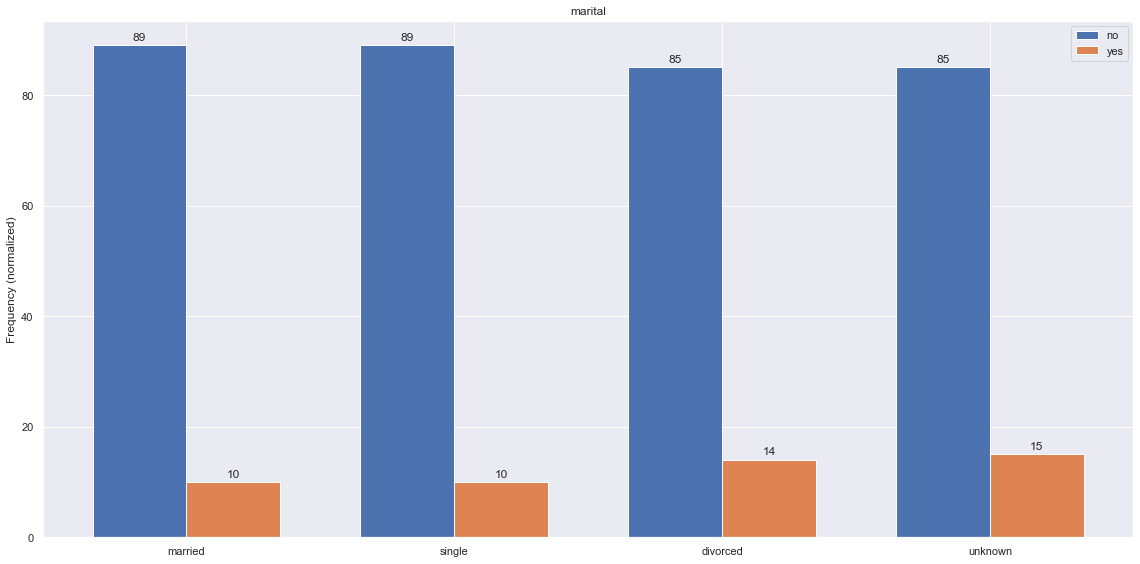

day_of_week
print(class1): day_of_week
fri    6981
mon    7667
thu    7578
tue    7137
wed    7185
dtype: int64
[89, 90, 87, 88, 88]


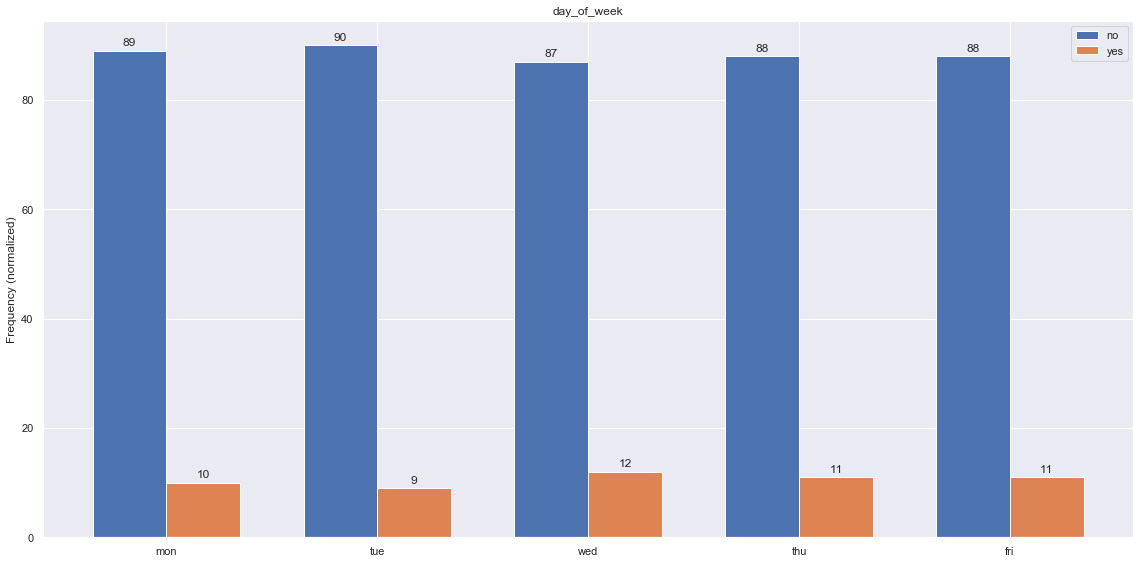

In [20]:
exclude_list = ['default', 'y']
# TODO check why the plotting crashes when default feature is used

for column in categorical_columns:
    if column not in exclude_list:
        print(column)
        plot_categorical_histogram_with_target(column_name=column, title=column, 
                                               data_frame=categorical_data, 
                                               normalize=True, save_figure=True)